# Chapter 2: Hierarchical Clustering

In [1]:
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np
import math
import sys
%matplotlib inline

# Set sig digits for output
np.set_printoptions(precision=3)

### Hierarchical Clustering Intuition by Example

Follow along below for a toy example of how hierarchical clustering works with a very simple use case. You will notice that many of the fields are hard-coded and this code shouldn't be interpreted as an ideal implementation.

[[ 1  7]
 [-5  9]
 [-9  4]
 [ 4 -2]]


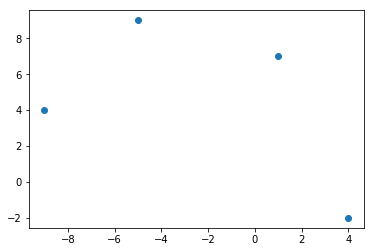

In [2]:
# Create 4 random test points
example = np.reshape([1,7,-5,9,-9,4,4,-2], (4,2))
print(example)
plt.scatter(example[:,0], example[:,1])
plt.show()

In [3]:
# Calculate Euclidean distance between data points
distances = cdist(example,example)

# Make diagonals infinity so np.argmin doesn't think the closest neighbor is itself
np.fill_diagonal(distances,sys.maxsize)

# View what the distance matrix looks like. 
# Infinity across diagonal, with distances mirrored across it ( you only need the bottom left )
print(distances)

[[9.223e+18 6.325e+00 1.044e+01 9.487e+00]
 [6.325e+00 9.223e+18 6.403e+00 1.421e+01]
 [1.044e+01 6.403e+00 9.223e+18 1.432e+01]
 [9.487e+00 1.421e+01 1.432e+01 9.223e+18]]


In [4]:
# Find the minimal distance between points in the distance matrix
position = np.unravel_index(distances.argmin(), distances.shape)

print(position)

(0, 1)


In [5]:
## Based off the information above, cluster Points 0 and 1 together
cluster_one = np.concatenate((example[position[0]], example[position[1]]), axis= 0).reshape((2,2))

print(cluster_one)

[[ 1  7]
 [-5  9]]


In [6]:
## Find centroid of cluster one by averaging x and y values of each of 2 points
cluster_one_centroid = \
[np.mean((cluster_one[0][0], cluster_one[1][0])), np.mean((cluster_one[0][1], cluster_one[1][1]))]

print(cluster_one_centroid)

[-2.0, 8.0]


In [7]:
# Add remaining un-clustered points to the centroid of cluster one
for x in example[2:]:
    for y in x:
        cluster_one_centroid.append(y)
        
new_points = np.reshape(cluster_one_centroid, (3,2))

print(new_points)

[[-2.  8.]
 [-9.  4.]
 [ 4. -2.]]


The guide above represents the walk through of one complete step in hierarchical clustering. Once the first cluster has been established, the process is completed with the remaining points until everything rolls up into 1 cluster. 

Now that you understand what is happening behind the scenes in hierarchical clustering, let's explore how it's executed in popular data packages. First we will explore functions in SciPy that can be seen as helpers that speed up the manual process above, and then Sci-Kit Learn which abstracts away everything into just a few lines of code!

### Exercise 1: Implementing Agglomerative Hierarchical Clustering

In this exercise we introduce helper functions provided by the SciPy package that help calculate distances and dendrograms for us.

In [8]:
# Import helper functions from SciPy
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [9]:
# Generate a random cluster dataset to experiment on. X = coordinate points, y = cluster labels (not needed)
X, y = make_blobs(n_samples=1000, centers=8, n_features=2, random_state=800)

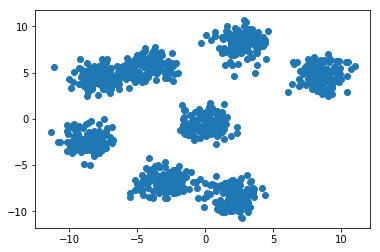

In [10]:
# Visualize the data
plt.scatter(X[:,0], X[:,1])
plt.show()

In [11]:
# Generate distance matrix with 'linkage' function
distances = linkage(X, method="centroid", metric="euclidean")

print(distances)

[[5.720e+02 7.620e+02 7.694e-03 2.000e+00]
 [3.000e+01 1.960e+02 8.879e-03 2.000e+00]
 [5.910e+02 8.700e+02 1.075e-02 2.000e+00]
 ...
 [1.989e+03 1.992e+03 7.812e+00 3.750e+02]
 [1.995e+03 1.996e+03 1.024e+01 7.500e+02]
 [1.994e+03 1.997e+03 1.200e+01 1.000e+03]]


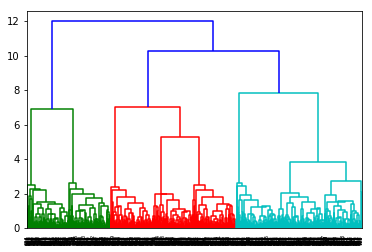

In [12]:
# Plot a dendrogram with 'dendrogram' function - notice how long it takes with large datasets!
dn = dendrogram(distances)

In [13]:
# Scipy also provides an 'fcluster' function that uses the distance matrix to generate cluster labels
scipy_clusters = fcluster(distances, 3, criterion="distance")

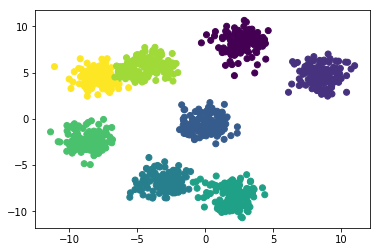

In [14]:
# Show the final cluster memberships as generated from SciPy packages
plt.scatter(X[:,0], X[:,1], c=scipy_clusters)
plt.show()

### Activity 1: Linkage Criteria

<b>Scenario:</b> You are given a data set without prior background information and are requested to find the hierarchical clustering linkage that fits it the best. 

<b>Aim: </b>Given what youâ€™ve learned about Agglomerative Clustering with Centroid Linkage in SciPy, evaluate the remaining Linkage types and consider when you would use each in practice.

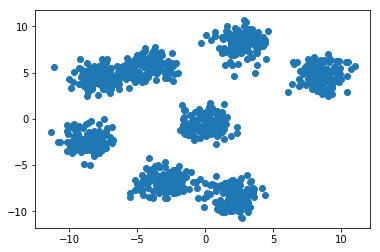

In [15]:
# Use the same dataset as seen in Exercise 1
# Visualize the data
plt.scatter(X[:,0], X[:,1])
plt.show()

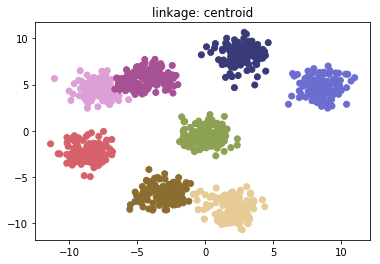

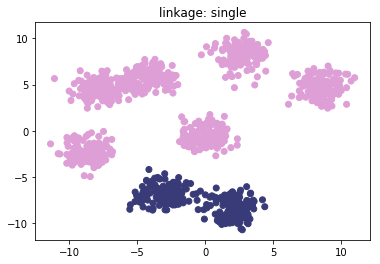

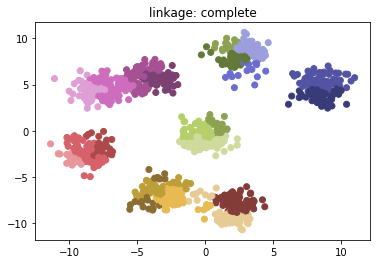

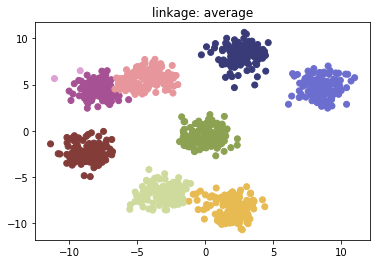

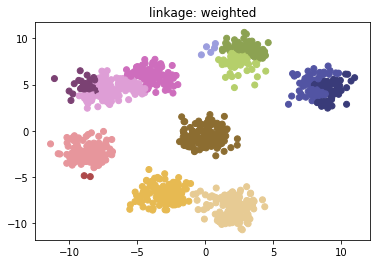

In [16]:
methods = ['centroid', 'single', 'complete', 'average', 'weighted']

for method in methods:
    distances = linkage(X, method=method, metric="euclidean")
    clusters = fcluster(distances, 3, criterion="distance") 
    plt.title('linkage: ' + method)
    plt.scatter(X[:,0], X[:,1], c=clusters, cmap='tab20b')
    plt.show()

View the documentation for 'linkage' and 'fcluster' to understand what each of the parameters is doing and how they impact the final clusters. Which methods best fit our specific problem? Why does changing one thing affect the other?

### Exercise 2: Agglomerative Hierarchical Clustering with Sci-Kit Learn

Now that you know how Hierarchical Clustering works, rest assured that you don't have to recreate it every time you want to use it. The popular Sci-Kit Learn package has this unsupervised learning algorithm built in for easy deployment!

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
ac = AgglomerativeClustering(n_clusters = 8, affinity="euclidean", linkage="average")

In [19]:
sklearn_clusters = ac.fit_predict(X)

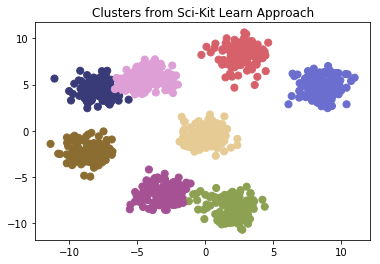

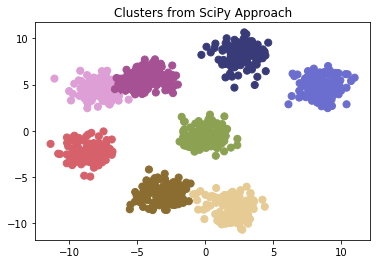

In [20]:
plt.figure(figsize=(6,4))
plt.title("Clusters from Sci-Kit Learn Approach")
plt.scatter(X[:, 0], X[:, 1], c = sklearn_clusters ,s=50, cmap='tab20b')
plt.show()

plt.figure(figsize=(6,4))
plt.title("Clusters from SciPy Approach")
plt.scatter(X[:, 0], X[:, 1], c = scipy_clusters ,s=50, cmap='tab20b')
plt.show()

### Activity 2:

<b>Scenario: </b> Your manager is asking you to evaluate different clustering approaches to see which works best for your use case. You need to be able to report back on which clustering method is most relevant based off the data you have available.

<b>Aim: </b> Implement K-Means and Hierarchical Clustering to the same dataset, and see which approach ends up being more accurate or easier for you to use. Try different combinations of Sci-Kit Learn implementations as well as through using helper functions in SciPy/NumPy.


In [21]:
from sklearn.cluster import KMeans

# Import moon generator from Sci-Kit Learn to provide a harder toy set
from sklearn.datasets import make_moons

In [22]:
# Generate moon structures X and labels y (not needed)
X, y = make_moons(n_samples=1000, noise=.05, random_state=800)

[[ 0.02   0.167]
 [-0.484  0.732]
 [ 1.992  0.253]
 ...
 [ 0.198  0.986]
 [ 1.89   0.114]
 [-0.51   0.773]]


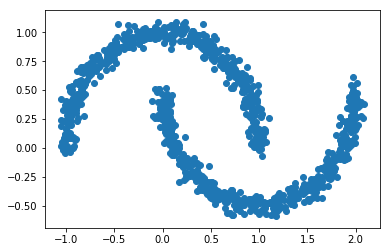

In [23]:
# Show data set
print(X)

# Visualize the data
plt.scatter(X[:,0], X[:,1])
plt.show()

In [24]:
# Generate clusters from K-Means
km = KMeans(2)
km_clusters = km.fit_predict(X)

In [25]:
# Generate clusters using Agglomerative Hierarchical Clustering
ac = AgglomerativeClustering(2, linkage='single')
ac_clusters = ac.fit_predict(X)

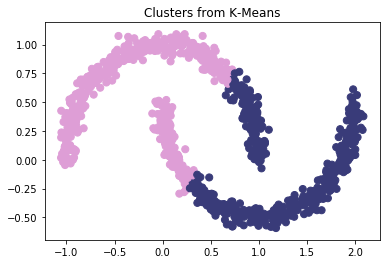

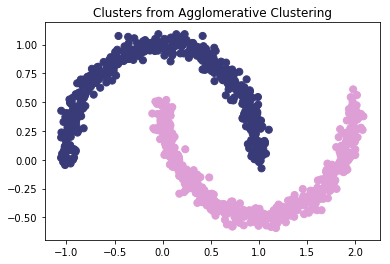

In [26]:
plt.title("Clusters from K-Means")
plt.scatter(X[:,0], X[:,1], c=km_clusters,s=50, cmap='tab20b')
plt.show()

plt.title("Clusters from Agglomerative Clustering")
plt.scatter(X[:,0], X[:,1], c=ac_clusters,s=50, cmap='tab20b')
plt.show()

Notice that Agglomerative Clustering works significantly better at finding the 2 clusters than K-Means. Why do you think this is? How does changing the Linkage method affect the quality of clustering?